<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Stanslus_Simple_Neural_Networks_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Load libraries 
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [82]:
#Mount drive
#from google.colab import drive
#drive.mount('/content/drive')


In [83]:
#Load data
# Load data

filename= '/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/heart - heart.csv'

df = pd.read_csv(filename)

# Show head
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [85]:
# Check for duplicates
df.duplicated().sum()

0

In [86]:
# check if any missing variables
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [87]:
#Data in good shape. No need for further cleaning 

In [88]:
# Create X feature matrix and y target vector
X = df.drop(columns = ['HeartDisease'])

y = df['HeartDisease']

In [89]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [90]:
#Import further libraries
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

In [91]:
#SEPERATE COLUMNS THAT HAVE NUMERIC DATA AND TOSE THAT HAVE CATEGORICAL DATA
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
#select the numeric columns of each type
X_train_num = num_selector(X_train)
X_train_cat = cat_selector(X_train)
X_test_num = num_selector(X_test)
X_test_cat = cat_selector(X_test)

In [92]:
print('numeric columns are', X_test_num)
print('numeric columns are', X_test_cat)

numeric columns are ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric columns are ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [93]:
cat_selector = make_column_selector(dtype_include='object')
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
39,F,ASY,Normal,Y,Flat
409,M,NAP,LVH,Y,Flat
762,M,ASY,LVH,Y,Flat
31,M,NAP,Normal,N,Up
768,F,ASY,Normal,N,Flat


In [94]:
#Initiate the one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# We pass values to the above parameters to change the default behaviour of the encorder

In [95]:
#transform both the training and the testing data
train_ohe = ohe_encoder.fit_transform(train_cat_data)
test_ohe = ohe_encoder.fit_transform(test_cat_data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
#convert to dataframe, extract new column names from encoder
#set prefixes to original column names
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
ohe_column_names1 = ohe_encoder.get_feature_names_out(test_cat_data.columns)
# The above method will get geature names from the onehotencoded data

# Create a dataframe
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names1)

In [97]:
test_ohe.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [98]:
# create a numeric selector
num_selector = make_column_selector(dtype_include='number')

In [99]:
# Slice the numeric columns from the train and test set
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)

In [100]:
train_nums.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,48,150,227,0,130,1.0
1,53,160,0,1,122,0.0
2,40,110,167,0,114,2.0
3,56,130,167,0,114,0.0
4,64,130,303,0,122,2.0


In [101]:
# SCALE THE CONTINOUS VARIABLES 
# Instantiate scaler object
scaler = StandardScaler()
scaler.fit(train_nums)



StandardScaler()

In [102]:
# Fit and transform on train data
train_nums = pd.DataFrame(scaler.transform(train_nums), columns = train_nums.columns)
# Transform test data
test_nums = pd.DataFrame(scaler.transform(test_nums), columns = test_nums.columns)

In [103]:
test_nums.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-0.699263,-1.279661,0.718905,-0.559444,-0.739699,0.113427
1,0.153361,-0.716885,-1.781543,-0.559444,-0.470290,1.535745
2,0.259939,0.239834,0.109705,1.787490,-0.585751,0.871996
3,-1.658465,-2.292657,-0.717716,-0.559444,-0.123908,1.535745
4,-0.166373,1.534218,0.000595,-0.559444,1.069188,-0.834785


In [104]:
#Concatenate Numerical and Categorical data
# Combine the categorical and numerical dataframes
X_train = pd.concat([train_nums, train_ohe], axis=1)
X_test = pd.concat([test_nums, test_ohe], axis=1)


**DEFINE THE SEQUENTIAL BASE MODEL**

In [105]:
# Instantiate Sequential model object
model = Sequential()

In [106]:
# get the input shape
input_shape = X_train.shape[1]
print(input_shape)

20


In [107]:
# First hidden layer
model.add(Dense(20, # Number of neurons = number of features == 20
                input_dim = input_shape, #Shape already defined in a previous function 
                activation = 'relu')) #use the relu activatio function
# Second hidden layer
model.add(Dense(10, # 10 neurons in the second hidden layer
                activation = 'relu')) #activated using teh relu function

In [108]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

**COMPILE THE MODEL**

In [110]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

FIT THE MODEL

In [111]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20) #Use 20 epochs

Epoch 1/20
22/22 [==============================] - 2s 27ms/step - loss: 0.7176 - accuracy: 0.4898 - val_loss: 0.6620 - val_accuracy: 0.6435
Epoch 2/20
22/22 [==============================] - 0s 11ms/step - loss: 0.6341 - accuracy: 0.6846 - val_loss: 0.5861 - val_accuracy: 0.7783
Epoch 3/20
22/22 [==============================] - 0s 9ms/step - loss: 0.5736 - accuracy: 0.7820 - val_loss: 0.5251 - val_accuracy: 0.8087
Epoch 4/20
22/22 [==============================] - 0s 12ms/step - loss: 0.5247 - accuracy: 0.7980 - val_loss: 0.4735 - val_accuracy: 0.8391
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.4822 - accuracy: 0.8140 - val_loss: 0.4278 - val_accuracy: 0.8522
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8241 - val_loss: 0.3881 - val_accuracy: 0.8565
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.8343 - val_loss: 0.3577 - val_accuracy: 0.8565
Epoch 8/20
22/22 

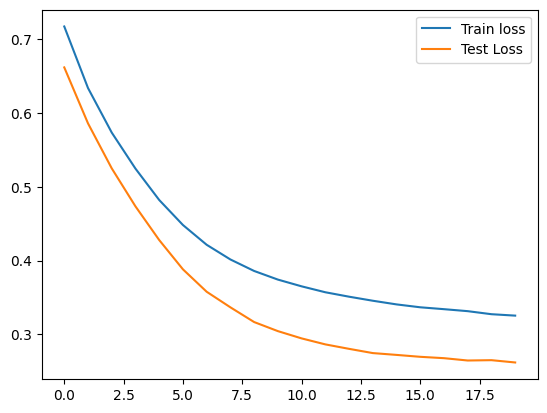

In [112]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Accuracy of the Model on Test Data

In [113]:
#Evaluate the model on Test Data
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.9000


[0.26172545552253723, 0.8999999761581421]

In [ ]:
#Obtained accuracy is 90%

**MODEL 2: KEEP NEURONS BUT REDUCE THE NUMBER OF LAYERS TO 1. # SAME EPOCHS**

In [114]:
# First hidden layer
model.add(Dense(20, # Number of neurons = number of features == 20
                input_dim = input_shape, #Shape already defined in a previous function 
                activation = 'relu')) #use the relu activatio function
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20) #Use 20 epochs
#Evaluate the model on Test Data
model.evaluate(X_test, y_test)


Epoch 1/20
22/22 [==============================] - 2s 24ms/step - loss: 0.7592 - accuracy: 0.3285 - val_loss: 0.7466 - val_accuracy: 0.2000
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 0.7324 - accuracy: 0.1584 - val_loss: 0.7212 - val_accuracy: 0.1130
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.7088 - accuracy: 0.2224 - val_loss: 0.6989 - val_accuracy: 0.4043
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5378 - val_loss: 0.6890 - val_accuracy: 0.5478
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.5552 - val_loss: 0.6866 - val_accuracy: 0.5478
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.5552 - val_loss: 0.6849 - val_accuracy: 0.5478
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5552 - val_loss: 0.6827 - val_accuracy: 0.5478
Epoch 8/20
22/22 [=

[0.5217155814170837, 0.856521725654602]

In [115]:
#The accuracy drops to 85% when the numbers of layers are redcued to only one layer

**KEEP TWO LAYERS BUT REDUCE NEURONS TO 5 IN THE SECOND LAYER**

In [117]:
# First hidden layer
model.add(Dense(20, # Number of neurons = number of features == 20
                input_dim = input_shape, #Shape already defined in a previous function 
                activation = 'relu')) #use the relu activatio function
# Second hidden layer
model.add(Dense(5, # 5 neurons in the second hidden layer
                activation = 'relu')) #activated using teh relu function
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20) #Use 20 epochs
#Evaluate the model on Test Data
model.evaluate(X_test, y_test)


Epoch 1/20
22/22 [==============================] - 3s 16ms/step - loss: 0.6972 - accuracy: 0.4578 - val_loss: 0.6903 - val_accuracy: 0.5478
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 0.5552 - val_loss: 0.6840 - val_accuracy: 0.5478
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.5552 - val_loss: 0.6786 - val_accuracy: 0.5478
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.5552 - val_loss: 0.6740 - val_accuracy: 0.5478
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6710 - accuracy: 0.5552 - val_loss: 0.6688 - val_accuracy: 0.5478
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.5552 - val_loss: 0.6624 - val_accuracy: 0.5478
Epoch 7/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6587 - accuracy: 0.5552 - val_loss: 0.6542 - val_accuracy: 0.5478
Epoch 8/20
22/22 [=

[0.45230841636657715, 0.8782608509063721]

In [118]:
#Accuracy is 88% in second iteration

In [119]:
#First Model at 90% gives the better accuracy